# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

In [223]:
#### Regression
# Re-Import
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


In [224]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p 

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(day_hour_count, day_hour_count, test_size=.20)

In [226]:
(
x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape
)

((192, 8), (48, 8), (192, 8), (48, 8))

In [227]:
y_train

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
177,17.7,1012.0,1063.0,1110.0,1148.0,861.0,351.0,329.0
209,20.9,221.0,284.0,293.0,304.0,167.0,143.0,128.0
149,14.9,203.0,223.0,242.0,229.0,303.0,402.0,439.0
115,11.5,189.0,163.0,204.0,237.0,231.0,382.0,359.0
225,22.5,87.0,132.0,152.0,158.0,137.0,114.0,99.0
...,...,...,...,...,...,...,...,...
6,0.6,21.0,14.0,22.0,25.0,42.0,58.0,83.0
48,4.8,9.0,11.0,14.0,8.0,10.0,5.0,2.0
33,3.3,2.0,1.0,3.0,2.0,9.0,16.0,17.0
94,9.4,433.0,387.0,436.0,492.0,486.0,308.0,189.0


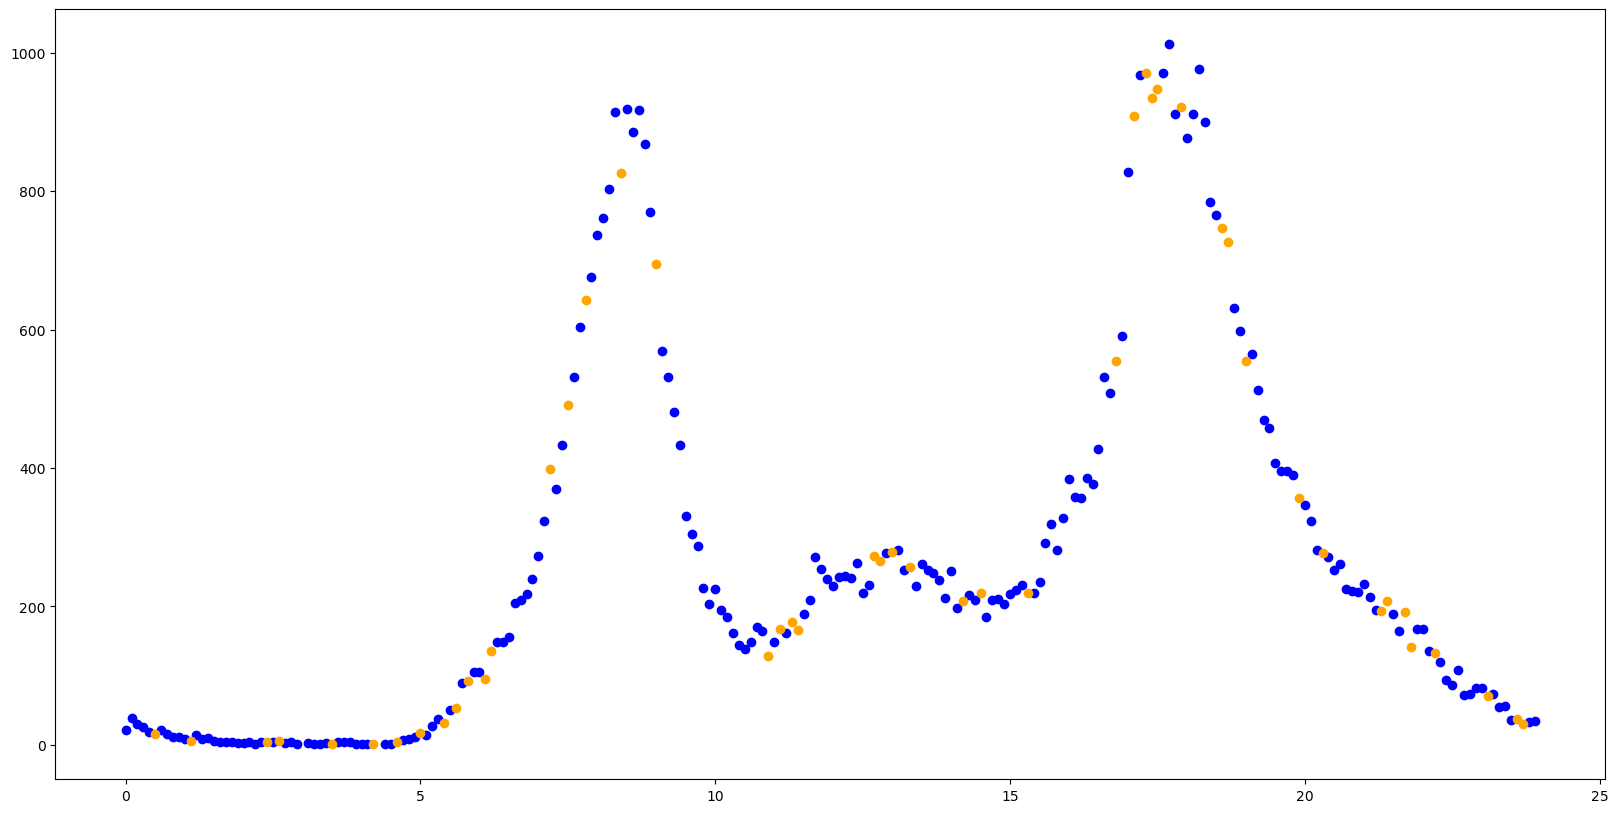

In [228]:
plt.scatter(x_train["hour"],x_train["monday"], c='b')
plt.scatter(x_test["hour"],x_test["monday"], c='orange')

In [229]:
x_train

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
177,17.7,1012.0,1063.0,1110.0,1148.0,861.0,351.0,329.0
209,20.9,221.0,284.0,293.0,304.0,167.0,143.0,128.0
149,14.9,203.0,223.0,242.0,229.0,303.0,402.0,439.0
115,11.5,189.0,163.0,204.0,237.0,231.0,382.0,359.0
225,22.5,87.0,132.0,152.0,158.0,137.0,114.0,99.0
...,...,...,...,...,...,...,...,...
6,0.6,21.0,14.0,22.0,25.0,42.0,58.0,83.0
48,4.8,9.0,11.0,14.0,8.0,10.0,5.0,2.0
33,3.3,2.0,1.0,3.0,2.0,9.0,16.0,17.0
94,9.4,433.0,387.0,436.0,492.0,486.0,308.0,189.0


In [230]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics
linear = linear_model.LinearRegression()

x = x_train['hour']
y = x_train['monday']

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(-1,1)
y = y.reshape(-1,1)

x = np.nan_to_num(x, nan=0.0) # A NaN is throwing off my models 
y = np.nan_to_num(y, nan=0.0)

In [231]:
linear_monday = linear_model.LinearRegression().fit(x, y)

In [232]:
x_test_val = x_test['hour']
y_test_val = x_test['monday']

x_test_val = np.asarray(x)
y_test_val = np.asarray(y)

x_test_val = x.reshape(-1,1)
y_test_val = y.reshape(-1,1)

x_test_val = np.nan_to_num(x, nan=0.0) # A NaN is throwing off my models 
y_test_val = np.nan_to_num(y, nan=0.0)

linear_monday
linear_monday.fit(x,y) # Built off Training Split

LinearRegression()

In [233]:
linear_monday.coef_,linear_monday.intercept_

(array([[12.82560919]]), array([113.59064369]))

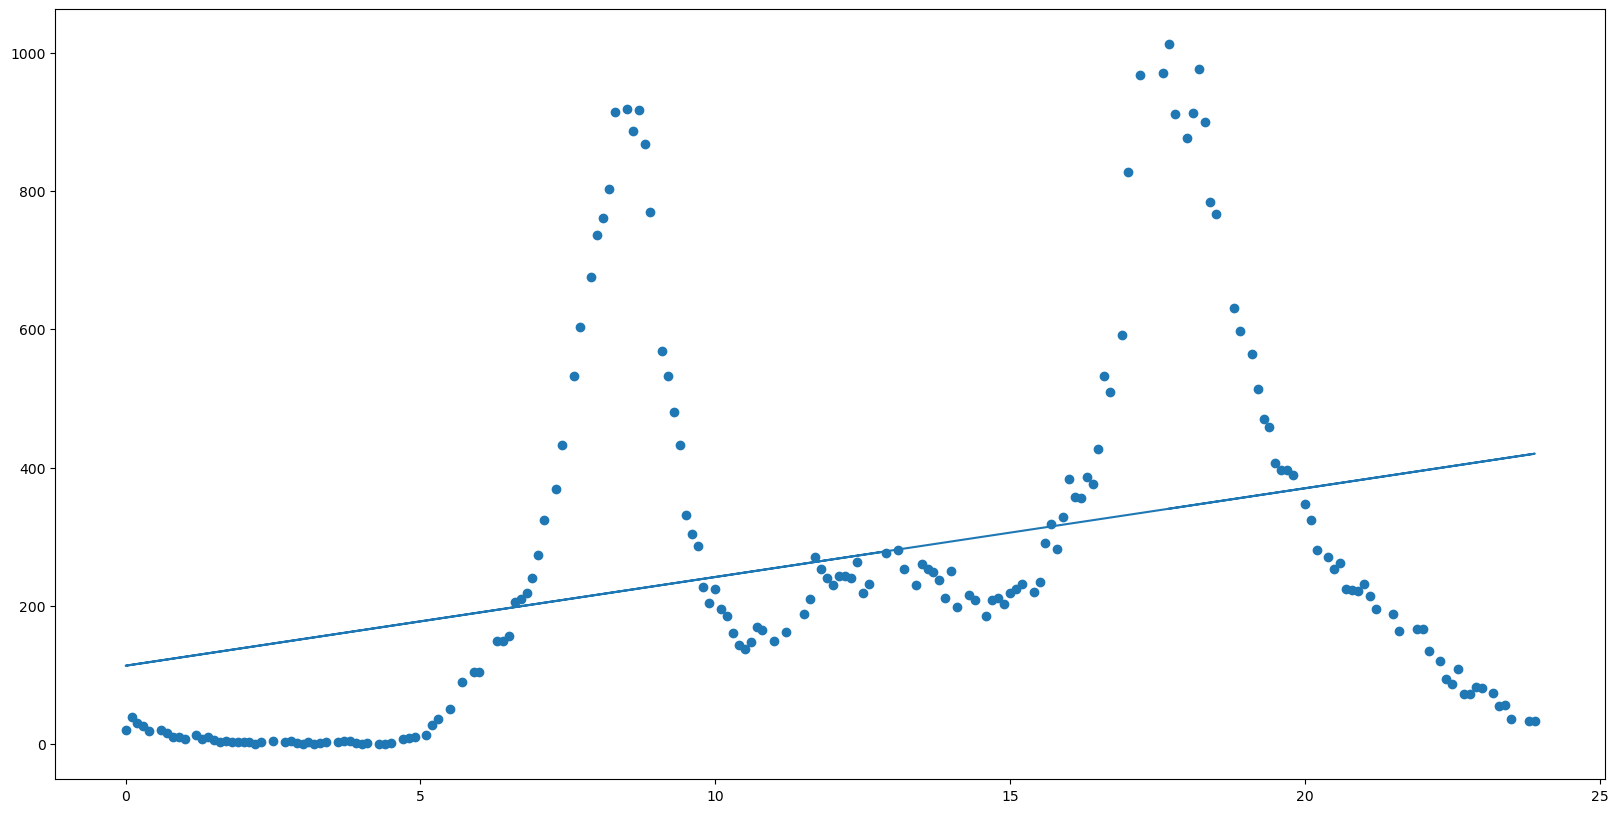

In [234]:
plt.scatter(x,y)
plt.plot(x_test_val, np.dot(x_test_val, linear_monday.coef_) + linear_monday.intercept_)

In [235]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_error

(
mean_squared_error(x_test_val, np.dot(x_test_val, linear_monday.coef_) + linear_monday.intercept_), # Error Calculated Against Test
mean_absolute_error(x_test_val, np.dot(x_test_val, linear_monday.coef_) + linear_monday.intercept_)
    )

(70480.30079583293, 252.4984375)

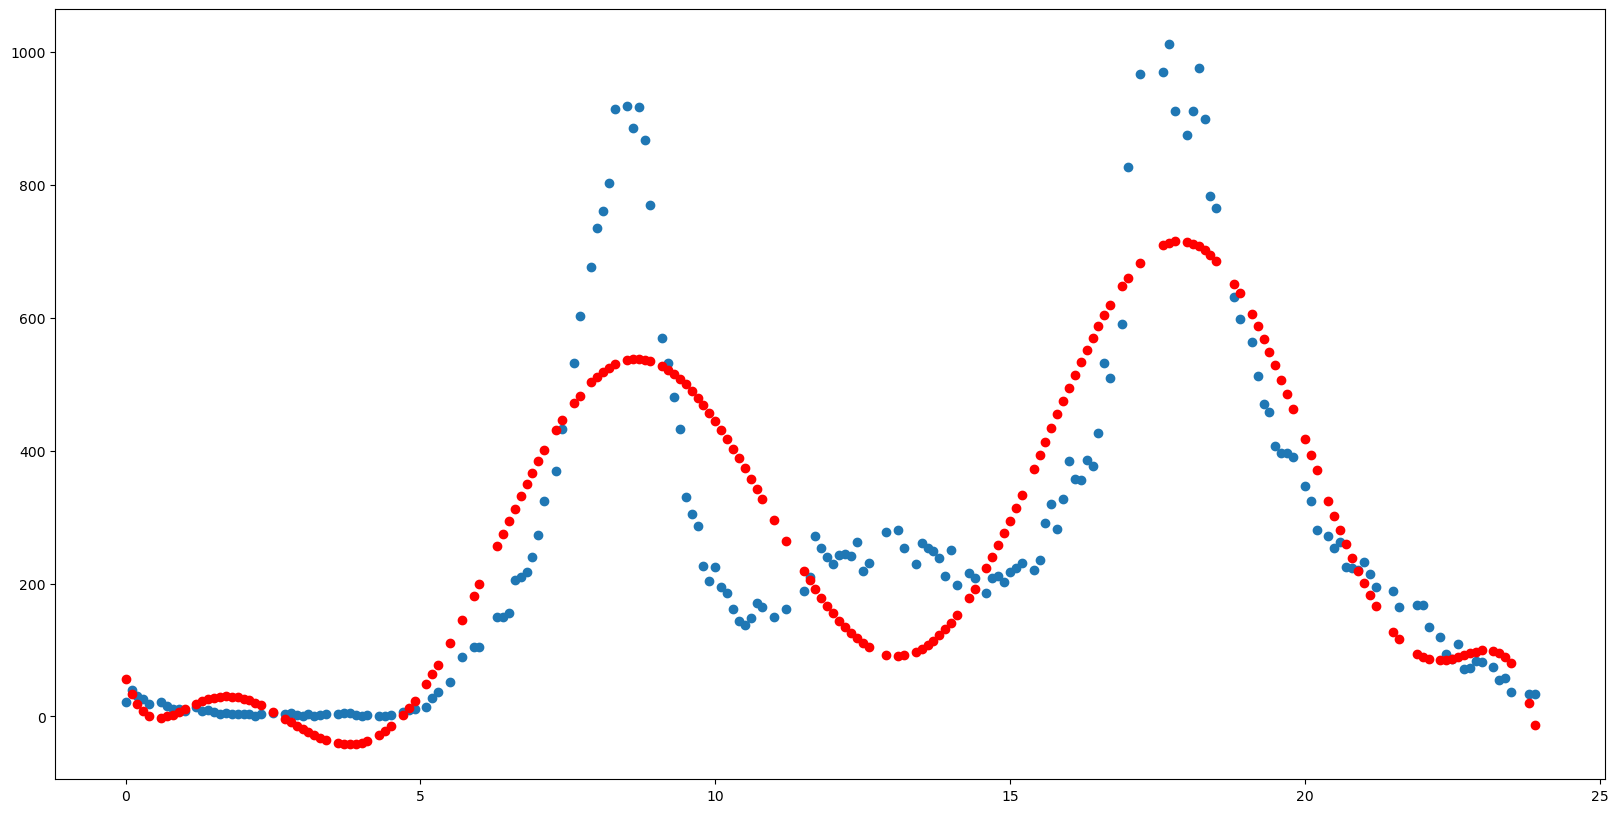

In [236]:
# BONUS: Using a Polynomial Model to increase accuracy and lower errors 
poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x)
linear10_monday = linear_model.LinearRegression()
linear10_monday.fit(x_10, y)
plt.scatter(x,y)
plt.scatter(x, linear10_monday.predict(x_10), c='r')


In [237]:
# linear10_monday.predict(x_10)

In [238]:
(
mean_squared_error(x_test_val, linear10_monday.predict(x_10)),
mean_absolute_error(x_test_val, linear10_monday.predict(x_10))
    )

# Conclusion: the polynomial model did not produce an error less than the one produced by the linear model; 
    # based on the visuals, this seems incorrect, but it may be that the model is more off for outliers, which
    # results in a higher mean squared error while leaving the absolute error much closer to the original model. 

(114130.80252191091, 258.5721558049679)

In [239]:
#### Classification
resume = pd.read_csv("../data/resume.csv")
# Source: https://www.kaggle.com/datasets/utkarshx27/which-resume-attributes-drive-job-callbacks?resource=download

In [240]:
resume

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,...,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,...,0,1,2,1,0,1,1,0,1,high


In [241]:
# Removing String Columns - Causing Issues With Decision Tree 
resume_no_strings = resume.select_dtypes(exclude = ['object']).dropna(axis=1) # NaN Also Causing Issues 
resume_no_strings
# resume.shape

,job_ad_id,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address
0,384,1,1,0,0,1,0,0,4,1,0,0,6,1,0,0,0,1,0
1,384,1,1,0,0,1,0,0,3,0,0,1,6,1,0,1,1,0,1
2,384,1,1,0,0,1,0,0,4,1,0,1,6,1,0,0,0,0,0
3,384,1,1,0,0,1,0,0,3,0,0,0,6,1,1,1,0,1,1
4,385,1,1,0,0,1,1,0,3,0,0,1,22,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,0,1,0,0,1,0,0,3,0,0,0,1,1,1,0,0,1,0
4866,382,0,0,0,0,0,0,0,4,1,0,1,6,1,0,0,0,0,0
4867,382,0,0,0,0,0,0,0,4,1,0,1,8,1,0,1,0,0,1
4868,382,0,0,0,0,0,0,0,4,1,0,1,2,1,0,1,1,0,1


In [242]:
resume_no_strings.columns

Index(['job_ad_id', 'job_equal_opp_employer', 'job_req_any',
       'job_req_communication', 'job_req_education', 'job_req_computer',
       'job_req_organization', 'received_callback', 'years_college',
       'college_degree', 'honors', 'worked_during_school', 'years_experience',
       'computer_skills', 'special_skills', 'volunteer', 'military',
       'employment_holes', 'has_email_address'],
      dtype='object')

In [243]:
# Random Sampling
w_train, w_test, z_train, z_test = train_test_split(resume_no_strings, resume_no_strings, test_size=.20)

In [244]:
(
w_train.shape,
w_test.shape,
z_train.shape,
z_test.shape
)

((3896, 19), (974, 19), (3896, 19), (974, 19))

In [245]:
# from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [246]:
dt_model = DecisionTreeClassifier(criterion='entropy')

In [247]:
w_inputs = w_train.drop('received_callback', axis = 1) # Building model off training split
w_output = w_train['received_callback'] # had some issues with making these subsections within the below line 
dt_model.fit(w_inputs, w_output) 

DecisionTreeClassifier(criterion='entropy')

In [248]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [249]:
# Predictions
w_test_inputs = w_test.drop('received_callback', axis = 1) 
w_test_output = w_test['received_callback'] # Building predictions off testing split

dt_predictions = dt_model.predict(w_test_inputs)

# Accuracy
resume_accuracy_score = accuracy_score(w_test_output, dt_predictions)
# Confusion Matrix
resume_confusion_matrix = confusion_matrix(w_test_output, dt_predictions)
# Classifcation Report
resume_classification_report = classification_report(w_test_output, dt_predictions)

In [250]:
(
print(resume_accuracy_score),
print(resume_confusion_matrix),
print(resume_classification_report)
)

0.8921971252566735
[[855  44]
 [ 61  14]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       899
           1       0.24      0.19      0.21        75

    accuracy                           0.89       974
   macro avg       0.59      0.57      0.58       974
weighted avg       0.88      0.89      0.89       974



(None, None, None)

In [251]:
## (BONUS) Attempt to Improve Model 
resume_new = resume_no_strings
resume_new["years_college_squared"] = resume_new["years_college"]^2 # Squaring Features will emphasize college & experience years 
resume_new["years_experience_squared"] = resume_new["years_experience"]^2
resume_new

,job_ad_id,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,college_degree,...,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,years_college_squared,years_experience_squared
0,384,1,1,0,0,1,0,0,4,1,...,0,6,1,0,0,0,1,0,6,4
1,384,1,1,0,0,1,0,0,3,0,...,1,6,1,0,1,1,0,1,1,4
2,384,1,1,0,0,1,0,0,4,1,...,1,6,1,0,0,0,0,0,6,4
3,384,1,1,0,0,1,0,0,3,0,...,0,6,1,1,1,0,1,1,1,4
4,385,1,1,0,0,1,1,0,3,0,...,1,22,1,0,0,0,0,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,0,1,0,0,1,0,0,3,0,...,0,1,1,1,0,0,1,0,1,3
4866,382,0,0,0,0,0,0,0,4,1,...,1,6,1,0,0,0,0,0,6,4
4867,382,0,0,0,0,0,0,0,4,1,...,1,8,1,0,1,0,0,1,6,10
4868,382,0,0,0,0,0,0,0,4,1,...,1,2,1,0,1,1,0,1,6,0


In [252]:
# Random Sampling for New Model
# Random Sampling; N for 'New Model'
n_train, n_test, m_train, m_test = train_test_split(resume_new, resume_new, test_size=.20)
#w_train.drop('received_callback', axis = 1)

In [253]:
dt_model_new = DecisionTreeClassifier(criterion='entropy')

n_inputs = n_train.drop('received_callback', axis = 1)
n_output = n_train['received_callback'] # had some issues with making these subsections within the below line 

dt_model_new.fit(n_inputs, n_output)
# dt_new_predictions = dt_model_new.predict(n_inputs, n_output)
# dt_new_predictions
# dt_predictions = dt_model.predict(w_test_inputs)

DecisionTreeClassifier(criterion='entropy')

In [254]:
# Predictions
n_test_inputs = n_test.drop('received_callback', axis = 1)
n_test_output = n_test['received_callback']

dt_new_predictions = dt_model_new.predict(n_test_inputs)

# Accuracy
resume_accuracy_score_new = accuracy_score(n_test_output, dt_new_predictions)
# Confusion Matrix
resume_confusion_matrix_new = confusion_matrix(n_test_output, dt_new_predictions)
# Classifcation Report
resume_classification_report_new = classification_report(n_test_output, dt_new_predictions)

In [255]:
(
print(resume_accuracy_score_new),
print(resume_confusion_matrix_new),
print(resume_classification_report_new)
)

0.9024640657084189
[[859  53]
 [ 42  20]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       912
           1       0.27      0.32      0.30        62

    accuracy                           0.90       974
   macro avg       0.61      0.63      0.62       974
weighted avg       0.91      0.90      0.91       974



(None, None, None)

In [ ]:
# Conclusion: Squaring certain featured increased precision and accuracy by a small amount for the classification model.